# **Twitter Topic Classification**

The dataset consists of 6,443 tweets collected from Twitter between 2019 and 2021, each with a unique identifier, a date, and preprocessed content that includes text, emojis, hashtags, and special tokens for URLs and user mentions.

 **Libraries import**

In [1]:
import json
import re
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
# Load the JSON data
with open('CETM47-22_23-AS2-Data 2.json', 'r') as f:
    data = json.load(f)

# Create a DataFrame from the JSON data
df = pd.DataFrame(data)

In [2]:
df.head()

,text,date,label,id,label_name
0,The {@Clinton LumberKings@} beat the {@Cedar R...,2019-09-08,4,1170516324419866624,sports_&_gaming
1,I would rather hear Eli Gold announce this Aub...,2019-09-08,4,1170516440690176006,sports_&_gaming
2,"Someone take my phone away, I’m trying to not ...",2019-09-08,4,1170516543387709440,sports_&_gaming
3,"A year ago, Louisville struggled to beat an FC...",2019-09-08,4,1170516620466429953,sports_&_gaming
4,Anyone know why the #Dodgers #Orioles game nex...,2019-09-08,4,1170516711411310592,sports_&_gaming


In [3]:
x_text = df["text"]
y_labels = df["label"]

In [4]:
my_labels = df["label_name"]

In [5]:
x_text.head()

0    The {@Clinton LumberKings@} beat the {@Cedar R...
1    I would rather hear Eli Gold announce this Aub...
2    Someone take my phone away, I’m trying to not ...
3    A year ago, Louisville struggled to beat an FC...
4    Anyone know why the #Dodgers #Orioles game nex...
Name: text, dtype: object

In [6]:
y_labels.head()

0    4
1    4
2    4
3    4
4    4
Name: label, dtype: int64

In [7]:
df.groupby(by= [df['label'], df['label_name']]).count()

,,text,date,id
label,label_name,,,
0,arts_&_culture,144,144,144
1,business_&_entrepreneurs,287,287,287
2,pop_culture,2512,2512,2512
3,daily_life,883,883,883
4,sports_&_gaming,2291,2291,2291
5,science_&_technology,326,326,326


# Data Visualization

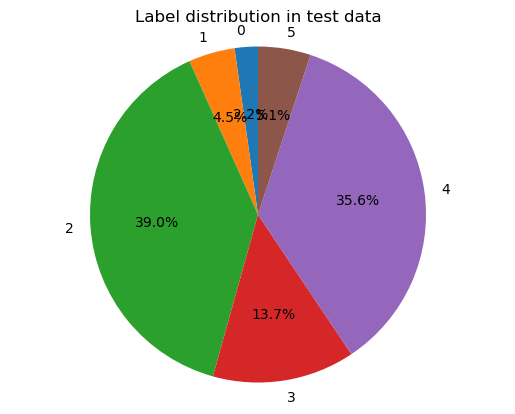

In [8]:
# Plot a pie chart of the label distribution in the test data
fig, ax = plt.subplots()
labels, counts = np.unique(y_labels, return_counts=True)
ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Label distribution in test data')
plt.show()

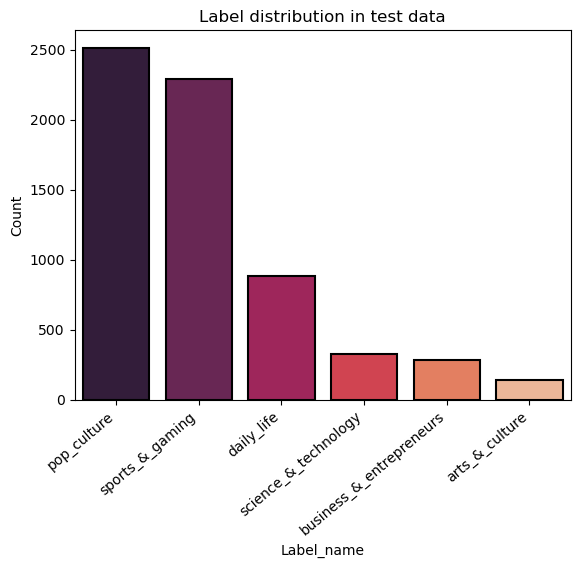

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

#sns.countplot(x='label_name', data=df)
sns.countplot(x='label_name', data=df, 
              order=df['label_name'].value_counts().index,
              palette='rocket', 
              edgecolor='black',
              linewidth=1.5,
              saturation=0.8)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

# Set the plot title and axis labels
plt.title('Label distribution in test data')
plt.xlabel('Label_name')
plt.ylabel('Count')
plt.xticks(rotation=40, ha='right')

# Show the plot
plt.show()

# Data cleaning

In [9]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
stp_wrds = set(stopwords.words("english"))

In [11]:
x_text = x_text.apply(lambda words : " ".join(word for word in words.split() if word.lower() not in stp_wrds))

In [12]:
x_text

0       {@Clinton LumberKings@} beat {@Cedar Rapids Ke...
1       would rather hear Eli Gold announce Auburn gam...
2       Someone take phone away, I’m trying look {@Chi...
3       year ago, Louisville struggled beat FCS oppone...
4       Anyone know #Dodgers #Orioles game next Thursd...
                              ...                        
6438    Praying {{USERNAME}} family friends riding IDA...
6439    Etsy: {{USERNAME}} Hi there, sorry hear accoun...
6440    Imagine hard Teume. Everyone us. look us. Figh...
6441    Ride - Mental Health Awareness Charity Cycle R...
6442    Prediction: future CX {@McKinsey Company@} Qua...
Name: text, Length: 6443, dtype: object

In [13]:
# Define a function for cleaning the text data
def clean_text(text):
    # Remove any non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Convert all text to lowercase
    text = text.lower()
    return text
x_text = x_text.apply(clean_text)

In [14]:
x_text.head()

0    clinton lumberkings beat cedar rapids kernels ...
1    would rather hear eli gold announce auburn gam...
2    someone take phone away im trying look chicago...
3    year ago louisville struggled beat fcs opponen...
4    anyone know dodgers orioles game next thursday...
Name: text, dtype: object

# COUNT VECTORIZER

In [15]:
vectorizer = CountVectorizer()
x_text = vectorizer.fit_transform(x_text)

In [16]:
x_text

<6443x22669 sparse matrix of type '<class 'numpy.int64'>'
	with 105181 stored elements in Compressed Sparse Row format>

In [17]:
x_text.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

**Train Test Split**

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_text, y_labels, test_size=0.2, random_state=40)

In [19]:
X_train

<5154x22669 sparse matrix of type '<class 'numpy.int64'>'
	with 84262 stored elements in Compressed Sparse Row format>

# MODELING

# K-nearest neighbors(KNN)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
model_KN = KNeighborsClassifier()
model_KN.fit(X_train, y_train)
y_pred_KN = model_KN.predict(X_test)

#print the accuracy score
acc = accuracy_score(y_test, y_pred_KN)
print(f'Accuracy score: {acc:2f}\n')
cm_KN = confusion_matrix(y_test, y_pred_KN)

Accuracy score: 0.603569



# Confusion matrix

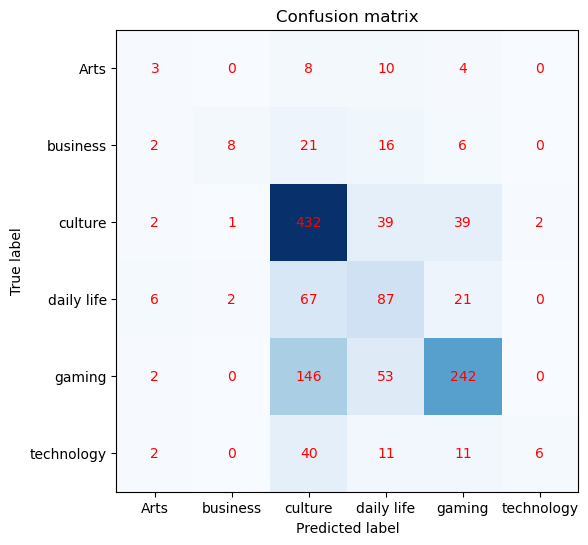

In [32]:
# Plot the confusion matrix as a heatmap
fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(cm_KN, cmap='Blues')
ax.set_xticks(np.arange(6))
ax.set_yticks(np.arange(6))
ax.set_xticklabels(['Arts', 'business', 'culture', 'daily life', 'gaming', 'technology'])
ax.set_yticklabels(['Arts', 'business', 'culture', 'daily life', 'gaming', 'technology'])
for i in range(6):
    for j in range(6):
        ax.text(j, i, cm_KN[i, j], ha='center', va='center', color='r')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()

In [33]:
print(classification_report(y_test, y_pred_KN))

              precision    recall  f1-score   support

           0       0.18      0.12      0.14        25
           1       0.73      0.15      0.25        53
           2       0.61      0.84      0.70       515
           3       0.40      0.48      0.44       183
           4       0.75      0.55      0.63       443
           5       0.75      0.09      0.15        70

    accuracy                           0.60      1289
   macro avg       0.57      0.37      0.39      1289
weighted avg       0.63      0.60      0.58      1289



# RandomForestClassifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
model_RFC = RandomForestClassifier()
model_RFC.fit(X_train, y_train)
y_pred_RFC = model_RFC.predict(X_test)

#print the accuracy score
acc = accuracy_score(y_test, y_pred_RFC)
print(f'Accuracy score: {acc:2f}\n')
cm_2 = confusion_matrix(y_test, y_pred_RFC)

Accuracy score: 0.733126



# Confusion matrix

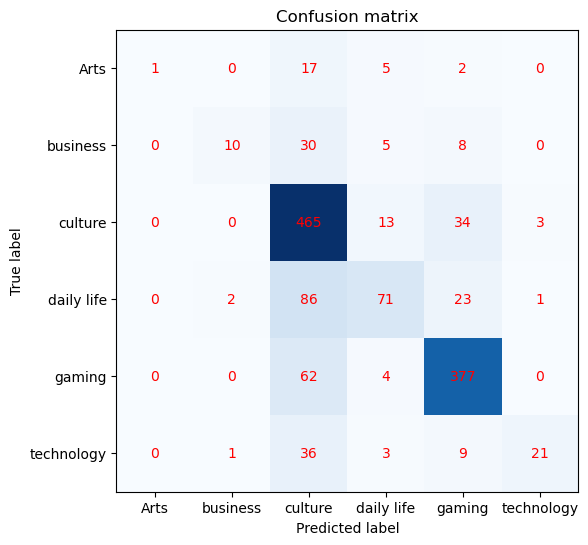

In [24]:
# Plot the confusion matrix as a heatmap
fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(cm_2, cmap='Blues')
ax.set_xticks(np.arange(6))
ax.set_yticks(np.arange(6))
ax.set_xticklabels(['Arts', 'business', 'culture', 'daily life', 'gaming', 'technology'])
ax.set_yticklabels(['Arts', 'business', 'culture', 'daily life', 'gaming', 'technology'])
for i in range(6):
    for j in range(6):
        ax.text(j, i, cm_2[i, j], ha='center', va='center', color='r')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()

In [25]:
print(classification_report(y_test, y_pred_RFC))

              precision    recall  f1-score   support

           0       1.00      0.04      0.08        25
           1       0.77      0.19      0.30        53
           2       0.67      0.90      0.77       515
           3       0.70      0.39      0.50       183
           4       0.83      0.85      0.84       443
           5       0.84      0.30      0.44        70

    accuracy                           0.73      1289
   macro avg       0.80      0.45      0.49      1289
weighted avg       0.75      0.73      0.70      1289



# naive_bayes Model Training

In [26]:
model_NB = MultinomialNB()
model_NB.fit(X_train, y_train)
y_pred_NB = model_NB.predict(X_test)

#print the accuracy score
acc = accuracy_score(y_test, y_pred_NB)
print(f'Accuracy score: {acc:2f}\n')
cm_3 = confusion_matrix(y_test, y_pred_NB)

Accuracy score: 0.782002



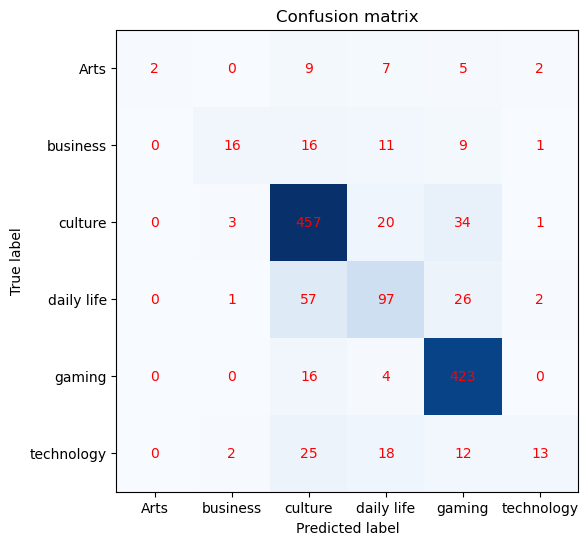

In [27]:
# Plot the confusion matrix as a heatmap
fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(cm_3, cmap='Blues')
ax.set_xticks(np.arange(6))
ax.set_yticks(np.arange(6))
ax.set_xticklabels(['Arts', 'business', 'culture', 'daily life', 'gaming', 'technology'])
ax.set_yticklabels(['Arts', 'business', 'culture', 'daily life', 'gaming', 'technology'])
for i in range(6):
    for j in range(6):
        ax.text(j, i, cm_3[i, j], ha='center', va='center', color='r')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()

In [28]:
print(classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

           0       1.00      0.08      0.15        25
           1       0.73      0.30      0.43        53
           2       0.79      0.89      0.83       515
           3       0.62      0.53      0.57       183
           4       0.83      0.95      0.89       443
           5       0.68      0.19      0.29        70

    accuracy                           0.78      1289
   macro avg       0.77      0.49      0.53      1289
weighted avg       0.77      0.78      0.76      1289

